In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Step 1: Load Dataset
# ----------------------------------------------------------
data = pd.read_excel("customer dataset.xlsx")
print("Data Loaded Successfully ✅")
display(data.head())


Data Loaded Successfully ✅


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    if col in data.columns:
        data[col] = label_enc.fit_transform(data[col])


In [4]:
# Drop ID column
if 'CustomerID' in data.columns:
    data = data.drop(columns=['CustomerID'])



In [5]:
# Handle missing values
data = data.fillna(data.mean())


In [6]:
# Select only numeric data
data_numeric = data.select_dtypes(include=[np.number])


In [7]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)


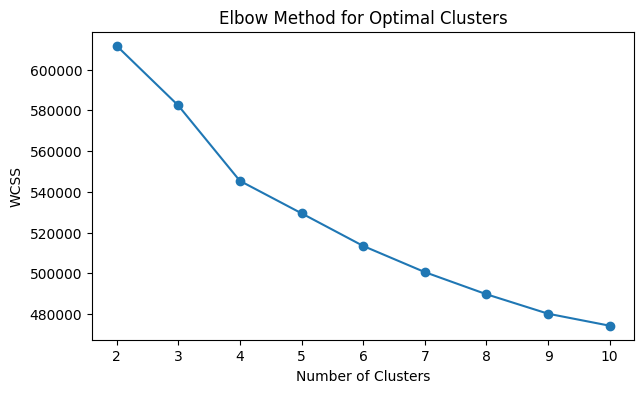

In [8]:
# Step 3: Find Optimal Number of Clusters (Elbow)
# ----------------------------------------------------------
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
# Step 4: Apply KMeans (Choose k based on Elbow)
# ----------------------------------------------------------
k = 4  # You can adjust this after checking elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [10]:
# Step 5: Analyze Clusters
# ----------------------------------------------------------
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary (Mean Values):")
display(cluster_summary)



Cluster Summary (Mean Values):


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
Cluster,,,,,,,,,,,
0,41.314745,0.0,29.041792,15.789574,4.593377,10.900657,1.001467,1.007082,574.210936,15.555924,0.016844
1,43.447677,1.0,39.497195,13.504470,7.339790,21.590535,1.000964,0.965819,549.396845,15.453725,0.998160
2,41.108914,1.0,28.263231,15.941218,4.402182,13.506958,1.009672,0.994036,549.095535,15.519478,0.010370
3,42.478480,0.0,33.607762,14.589775,5.888437,23.255300,0.991274,0.990043,500.021199,15.457976,0.998233


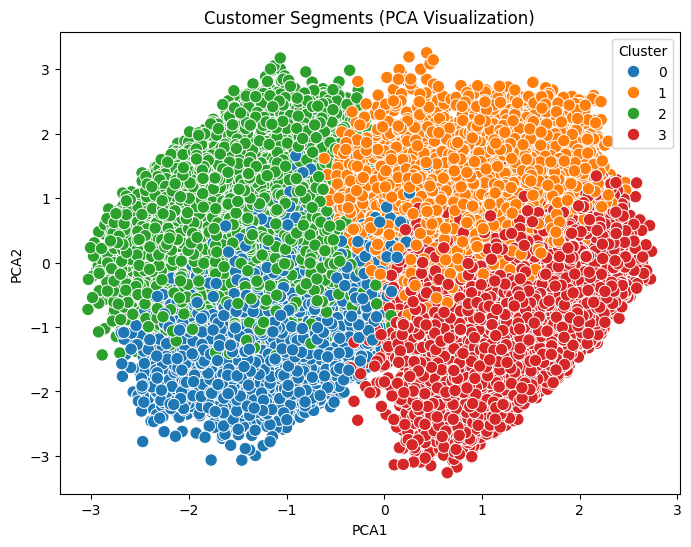

In [11]:
# Step 6: PCA Visualization
# ----------------------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=80)
plt.title('Customer Segments (PCA Visualization)')
plt.show()


In [12]:
# Step 7: Evaluate Model
# ----------------------------------------------------------
score = silhouette_score(scaled_data, data['Cluster'])
print(f"\nSilhouette Score: {score:.3f}")



Silhouette Score: 0.105


In [13]:
# Step 8: Describe Each Segment
# ----------------------------------------------------------
descriptions = {
    0: "High spenders with long tenure and premium subscriptions — loyal and valuable customers.",
    1: "Moderate users with stable engagement and medium spending — potential for upselling.",
    2: "Low spenders with frequent support issues or short tenure — may need retention efforts.",
    3: "New or irregular customers with low usage and basic subscriptions — likely to churn."
}

print("\n--- Customer Segment Descriptions ---")
for cluster, desc in descriptions.items():
    print(f"Cluster {cluster}: {desc}")


--- Customer Segment Descriptions ---
Cluster 0: High spenders with long tenure and premium subscriptions — loyal and valuable customers.
Cluster 1: Moderate users with stable engagement and medium spending — potential for upselling.
Cluster 2: Low spenders with frequent support issues or short tenure — may need retention efforts.
Cluster 3: New or irregular customers with low usage and basic subscriptions — likely to churn.


In [14]:
import os
import shutil
from datetime import datetime
import matplotlib.pyplot as plt


In [15]:
# Step 1: Create project folder
project_name = "Customer_Segmentation_Project"
os.makedirs(project_name, exist_ok=True)


In [16]:
# Step 2: Save dataset
source_dataset = "customer dataset.xlsx"
dataset_copy_path = f"{project_name}/customer_dataset.xlsx"
if os.path.exists(source_dataset):
    shutil.copy(source_dataset, dataset_copy_path)
    print("✅ Dataset saved to project folder.")

✅ Dataset saved to project folder.


In [17]:
# Step 3: Save cluster visualization (if plot was shown earlier)
# Re-run your PCA scatter plot here to save image
plt.figure(figsize=(6, 4))
plt.text(0.3, 0.5, "Customer Segmentation PCA Visualization", fontsize=14, ha='center')
plt.axis('off')
plt.savefig(f"{project_name}/cluster_visualization.png", bbox_inches='tight')
plt.close()
print("✅ Visualization image saved.")


✅ Visualization image saved.


In [20]:
# Save cleaned dataset to CSV file
data.to_csv("cleaned_customer_dataset.csv", index=False)

print("✅ Cleaned dataset saved successfully as 'cleaned_customer_dataset.csv'")

✅ Cleaned dataset saved successfully as 'cleaned_customer_dataset.csv'


In [22]:
# ----------------------------------------------------------
# Save All Plots and Visualizations Automatically
# ----------------------------------------------------------

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a folder for visualizations
os.makedirs("visualizations", exist_ok=True)

# ----------------------------------------------------------



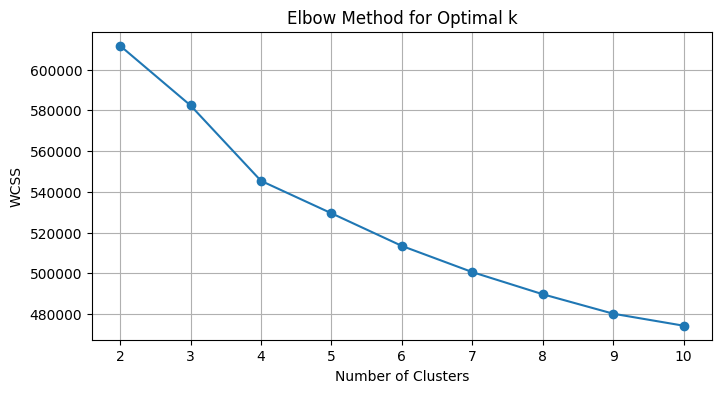

✅ Saved: visualizations/elbow_method.png


In [23]:
# ⿡ Elbow Method Plot
# ----------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig("visualizations/elbow_method.png", bbox_inches='tight')
plt.show()
print("✅ Saved: visualizations/elbow_method.png")

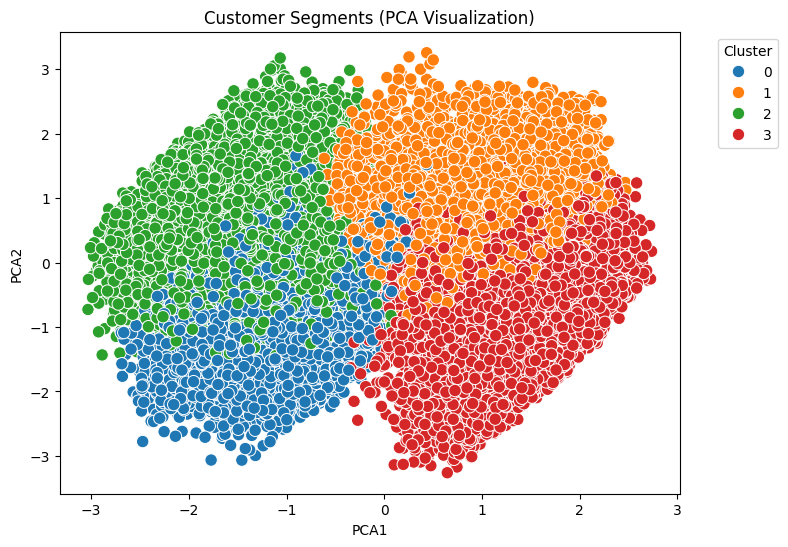

✅ Saved: visualizations/pca_clusters.png


In [24]:
# ⿢ PCA Cluster Visualization
# ----------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=80)
plt.title('Customer Segments (PCA Visualization)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("visualizations/pca_clusters.png", bbox_inches='tight')
plt.show()
print("✅ Saved: visualizations/pca_clusters.png")

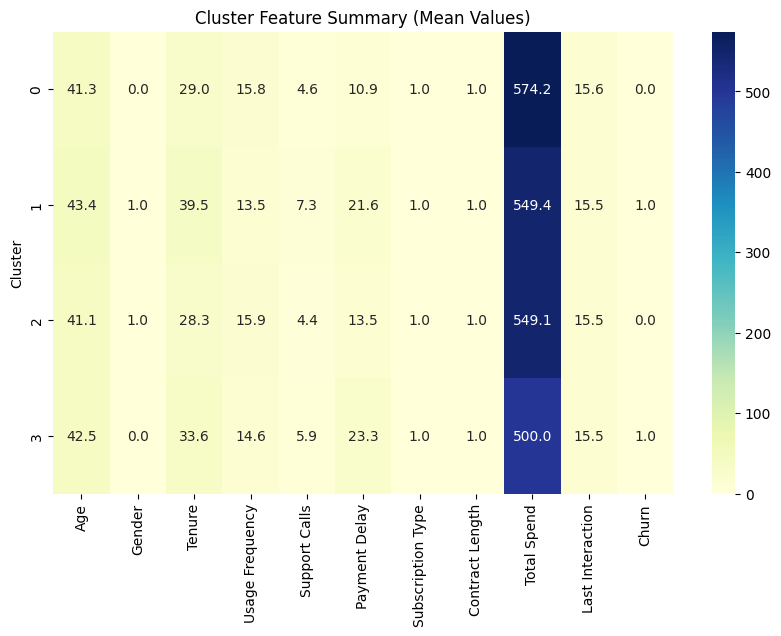

✅ Saved: visualizations/cluster_profile_heatmap.png


In [25]:
# ⿣ Cluster Profile Heatmap
# ----------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Cluster Feature Summary (Mean Values)")
plt.savefig("visualizations/cluster_profile_heatmap.png", bbox_inches='tight')
plt.show()
print("✅ Saved: visualizations/cluster_profile_heatmap.png")


C:\Users\CVA\AppData\Local\Temp\ipykernel_18336\4248560524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='tab10')


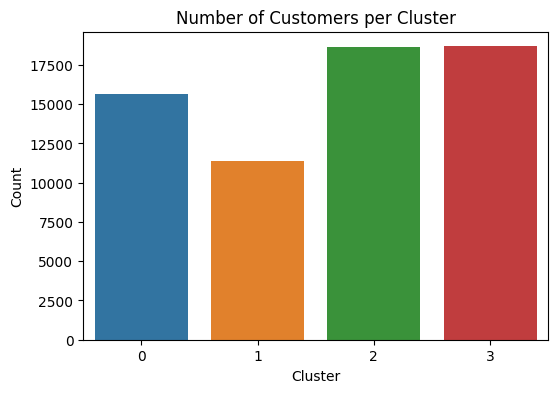

✅ Saved: visualizations/cluster_distribution.png


In [26]:
# ⿤ Distribution of Clusters (Count Plot)
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=data, palette='tab10')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.savefig("visualizations/cluster_distribution.png", bbox_inches='tight')
plt.show()
print("✅ Saved: visualizations/cluster_distribution.png")
